In [1]:
import pandas as pd
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['label'] = data.target


In [2]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop('label', axis=1))


In [3]:
from sklearn.decomposition import PCA

# Specify the number of principal components
n_components = 10

pca = PCA(n_components=n_components)
pca_features = pca.fit_transform(scaled_features)


In [4]:
from sklearn.cluster import KMeans

# Specify the number of clusters
n_clusters = 2

kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(pca_features)


In [6]:
cluster_centers_pca = pca.inverse_transform(kmeans.cluster_centers_)

# Convert PCA features back to original features
cluster_centers_original = scaler.inverse_transform(cluster_centers_pca)

# Interpret the clusters using the original feature names
cluster_centers_df = pd.DataFrame(cluster_centers_original, columns=data.feature_names)


In [7]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Silhouette Score
silhouette = silhouette_score(pca_features, cluster_labels)

# Davies-Bouldin Index
davies_bouldin = davies_bouldin_score(pca_features, cluster_labels)

# Calinski-Harabasz Index
calinski_harabasz = calinski_harabasz_score(pca_features, cluster_labels)

print("Silhouette Score:", silhouette)
print("Davies-Bouldin Index:", davies_bouldin)
print("Calinski-Harabasz Index:", calinski_harabasz)


Silhouette Score: 0.3577446806021596
Davies-Bouldin Index: 1.2566915967819043
Calinski-Harabasz Index: 288.09157265386114


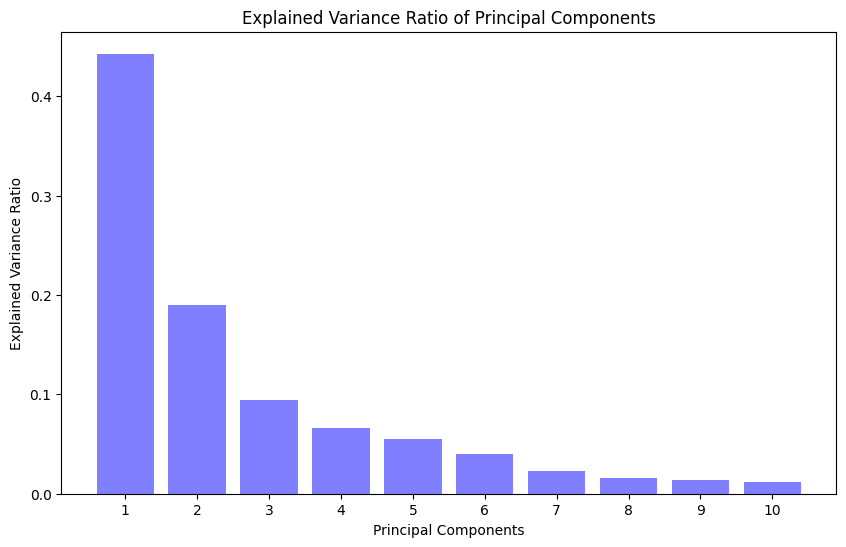

In [9]:
# Visualize explained variance ratio of principal components
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.bar(range(1, n_components + 1), pca.explained_variance_ratio_, color='blue', alpha=0.5)
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio of Principal Components')
plt.xticks(range(1, n_components + 1))
plt.show()


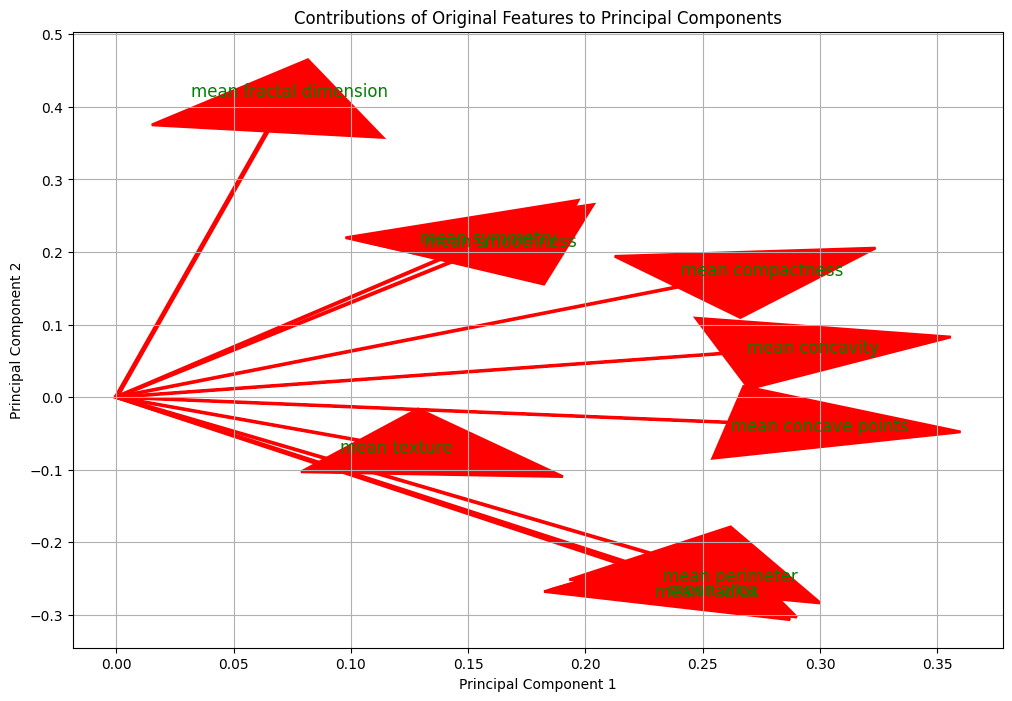

In [12]:
# Plot the contributions of original features to the first two principal components
plt.figure(figsize=(12, 8))
for i in range(len(pca.components_)):
    plt.arrow(0, 0, pca.components_[0, i], pca.components_[1, i], head_width=0.1, head_length=0.1, linewidth=2, color='r')
    plt.text(pca.components_[0, i]*1.15, pca.components_[1, i]*1.15, df.columns[i], color='g', ha='center', va='center', fontsize=12)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Contributions of Original Features to Principal Components')
plt.grid()
plt.show()


K-Means Clustering

WCSS

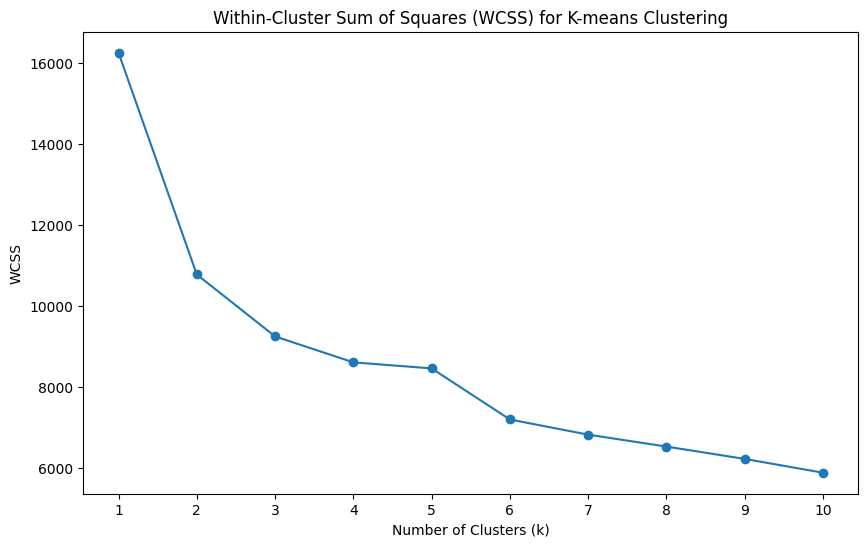

In [11]:
# Calculate Within-Cluster Sum of Squares (WCSS) for different values of k
wcss_values = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_features)
    wcss_values.append(kmeans.inertia_)

# Visualize WCSS values
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Within-Cluster Sum of Squares (WCSS) for K-means Clustering')
plt.xticks(range(1, 11))
plt.show()


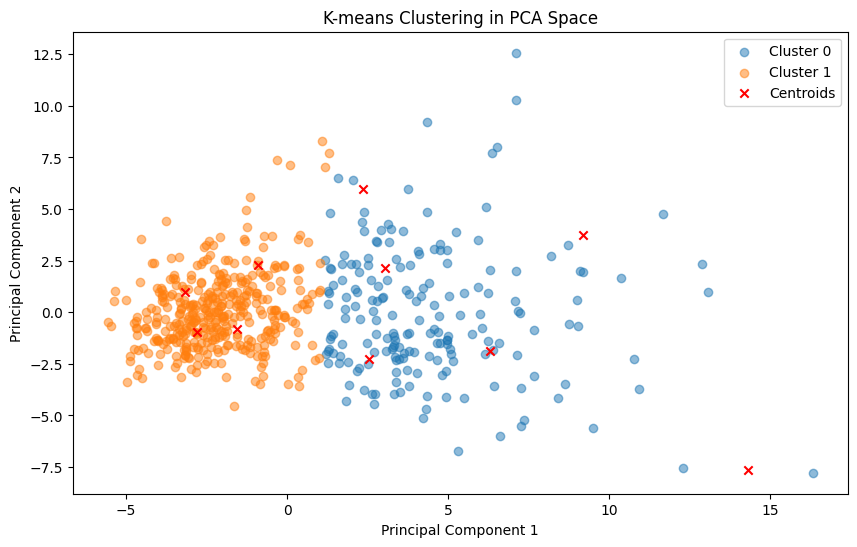

In [13]:
# Visualize cluster centers in PCA space
plt.figure(figsize=(10, 6))
for i in range(n_clusters):
    plt.scatter(pca_features[cluster_labels == i, 0], pca_features[cluster_labels == i, 1], label=f'Cluster {i}', alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', color='red', label='Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering in PCA Space')
plt.legend()
plt.show()


In [52]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Silhouette Score
silhouette = silhouette_score(pca_features, cluster_labels)

# Davies-Bouldin Index
davies_bouldin = davies_bouldin_score(pca_features, cluster_labels)

# Calinski-Harabasz Index
calinski_harabasz = calinski_harabasz_score(pca_features, cluster_labels)

print("Silhouette Score:", silhouette)
print("Davies-Bouldin Index:", davies_bouldin)
print("Calinski-Harabasz Index:", calinski_harabasz)

Silhouette Score: 0.3577446806021596
Davies-Bouldin Index: 1.2566915967819043
Calinski-Harabasz Index: 288.09157265386114


In [17]:
pca_features[2]

array([ 5.73389628, -1.0751738 , -0.55174759,  0.91208268, -0.17708585,
        0.54145203, -0.66816561,  0.09736766,  0.024075  ,  0.45424969])

In [18]:
pca_features[1]

array([ 2.3878018 , -3.76817174, -0.52929269,  1.11826386,  0.62177497,
        0.02865638,  0.01335803,  0.24098753, -0.71190996,  1.10699177])

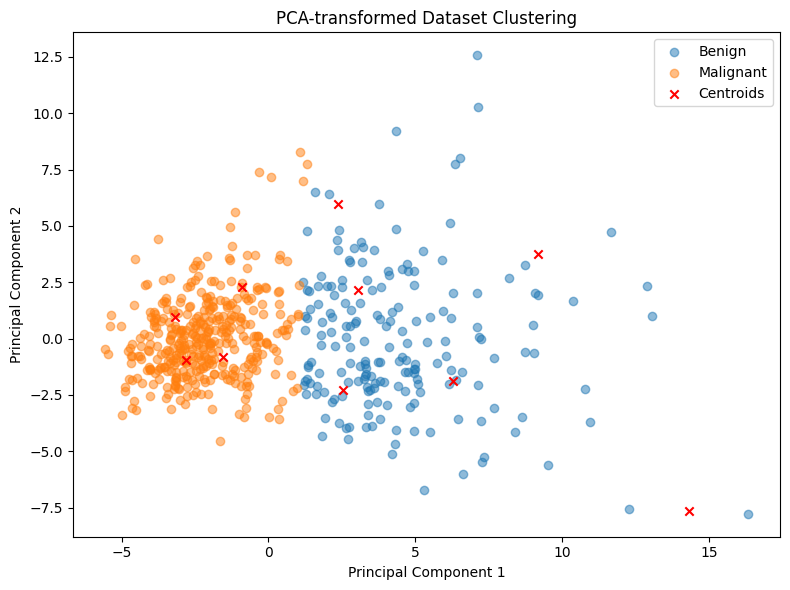

In [23]:
# Original Dataset Clustering Visualization
plt.figure(figsize=(8, 6))

# PCA-transformed Dataset
for i in range(n_clusters):
    if i == 0:
        plt.scatter(pca_features[cluster_labels == i, 0], pca_features[cluster_labels == i, 1], label='Benign', alpha=0.5)
    elif i == 1:
        plt.scatter(pca_features[cluster_labels == i, 0], pca_features[cluster_labels == i, 1], label='Malignant', alpha=0.5)

# Plot centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', color='red', label='Centroids')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA-transformed Dataset Clustering')
plt.legend()

plt.tight_layout()
plt.show()


Hierarchical clustering

In [24]:
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import scipy.cluster.hierarchy as sch

In [28]:
# Hierarchical Clustering
def hierarchical_clustering(X, n_clusters):
    # Perform hierarchical clustering
    hc = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    cluster_labels = hc.fit_predict(X)
    
    # Plot dendrogram
    plt.figure(figsize=(10, 6))
    dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
    plt.title('Dendrogram')
    plt.xlabel('Samples')
    plt.ylabel('Distance')
    plt.show()
    
    return cluster_labels


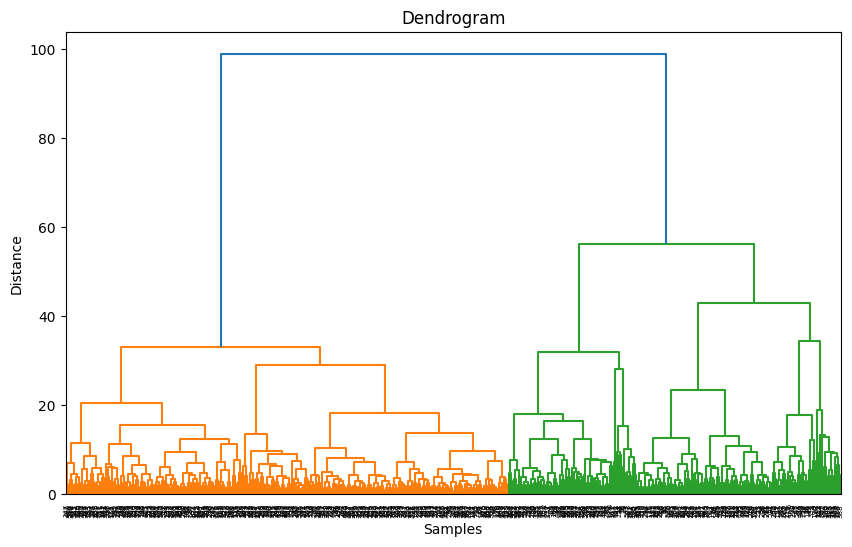

In [29]:
# Hierarchical Clustering
n_clusters = 2  # Number of clusters
hierarchical_cluster_labels = hierarchical_clustering(pca_features, n_clusters)


C:\Users\Riyaz\AppData\Local\Temp\ipykernel_3040\3158507074.py:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[cluster_labels == i, 0], X[cluster_labels == i, 1], label='Benign', cmap='viridis', alpha=0.5)
C:\Users\Riyaz\AppData\Local\Temp\ipykernel_3040\3158507074.py:13: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[cluster_labels == i, 0], X[cluster_labels == i, 1], label='Malignant', cmap='viridis', alpha=0.5)


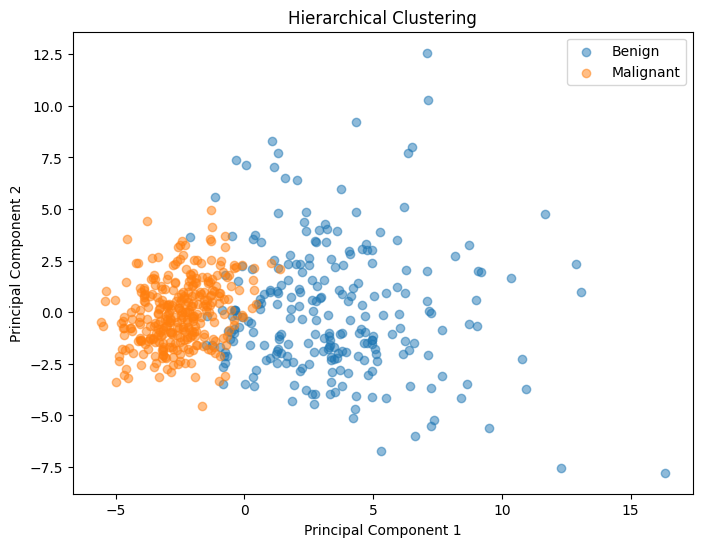

In [36]:
# Hierarchical Clustering
def hierarchical_clustering(X, n_clusters):
    # Perform hierarchical clustering
    hc = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    cluster_labels = hc.fit_predict(X)
    
    # Plot clusters with labels
    plt.figure(figsize=(8, 6))
    for i in range(n_clusters):
        if i == 0:
            plt.scatter(X[cluster_labels == i, 0], X[cluster_labels == i, 1], label='Benign', cmap='viridis', alpha=0.5)
        elif i == 1:
            plt.scatter(X[cluster_labels == i, 0], X[cluster_labels == i, 1], label='Malignant', cmap='viridis', alpha=0.5)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('Hierarchical Clustering')
    plt.legend()
    plt.show()
    
    return cluster_labels

# Hierarchical Clustering
n_clusters = 2  # Number of clusters
hierarchical_cluster_labels = hierarchical_clustering(pca_features, n_clusters)


In [38]:
from sklearn.metrics import calinski_harabasz_score

# Evaluate hierarchical clustering
calinski_score_hierarchical = calinski_harabasz_score(pca_features, hierarchical_cluster_labels)

print("Performance Metrics for Hierarchical Clustering:")
print(f"Silhouette Score: {silhouette_hierarchical}")
print(f"Davies-Bouldin Score: {db_score_hierarchical}")
print(f"Calinski-Harabasz Score: {calinski_score_hierarchical}")

Performance Metrics for Hierarchical Clustering:
Silhouette Score: 0.2959930385545922
Davies-Bouldin Score: 1.38045939900175
Calinski-Harabasz Score: 244.09433791916


C:\Users\Riyaz\AppData\Local\Temp\ipykernel_3040\3422559892.py:18: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[cluster_labels == label, 0], X[cluster_labels == label, 1], label=f'Cluster {cluster_names[label]}', cmap='viridis', alpha=0.5)


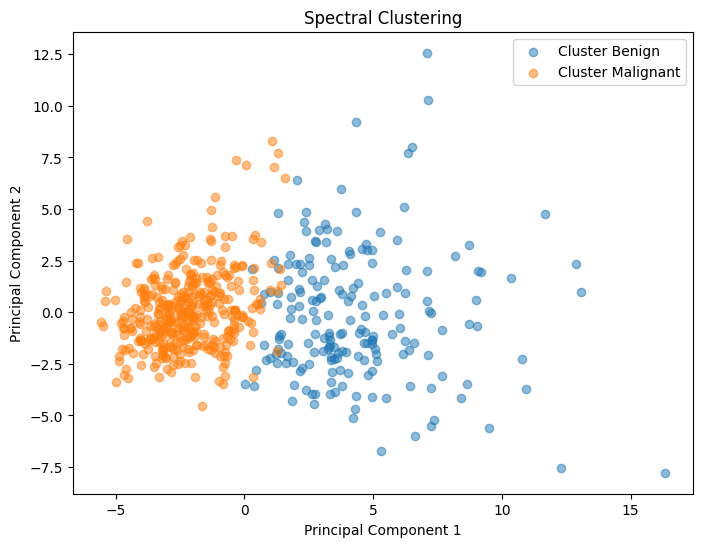

In [53]:
from sklearn.cluster import SpectralClustering
import numpy as np
import matplotlib.pyplot as plt

# Spectral Clustering
def spectral_clustering(X, n_clusters):
    # Perform spectral clustering
    sc = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors', random_state=42)
    cluster_labels = sc.fit_predict(X)
    
    # Map cluster labels to corresponding names
    cluster_names = {0: 'Benign', 1: 'Malignant'}  # Assigning labels as 'Benign' and 'Malignant'
    cluster_labels_named = [cluster_names[label] for label in cluster_labels]
    
    # Plot clusters
    plt.figure(figsize=(8, 6))
    for label in np.unique(cluster_labels):
        plt.scatter(X[cluster_labels == label, 0], X[cluster_labels == label, 1], label=f'Cluster {cluster_names[label]}', cmap='viridis', alpha=0.5)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('Spectral Clustering')
    plt.legend()
    plt.show()
    
    return cluster_labels_named

# Spectral Clustering
n_clusters = 2  # Number of clusters
spectral_cluster_labels = spectral_clustering(pca_features, n_clusters)


Performance metrics

In [54]:
# Evaluate spectral clustering
silhouette_spectral = silhouette_score(pca_features, spectral_cluster_labels)
db_score_spectral = davies_bouldin_score(pca_features, spectral_cluster_labels)
calinski_score_spectral = calinski_harabasz_score(pca_features, spectral_cluster_labels)

print("Performance Metrics for Spectral Clustering:")
print(f"Silhouette Score: {silhouette_spectral}")
print(f"Davies-Bouldin Score: {db_score_spectral}")
print(f"Calinski-Harabasz Score: {calinski_score_spectral}")


Performance Metrics for Spectral Clustering:
Silhouette Score: 0.3514581018209996
Davies-Bouldin Score: 1.26858583478786
Calinski-Harabasz Score: 283.4276925928896


Additional information

In [ ]:
# Assuming pca is your PCA object
third_pc_contributions = pca.components_[2]

# Match each contribution with the original feature names
original_feature_names = data.feature_names  # Assuming data is your dataset
for feature, contribution in zip(original_feature_names, third_pc_contributions):
    print(f"Feature: {feature}, Contribution: {contribution}")


In [51]:
# Assuming pca is your PCA object
components = pca.components_

# Match each component with the original feature names
original_feature_names = data.feature_names  # Assuming data is your dataset
for i, component in enumerate(components):
    print(f"Principal Component {i + 1}:")
    for j, contribution in enumerate(component):
        print(f"    Feature: {original_feature_names[j]}, Contribution: {contribution}")


Principal Component 1:
    Feature: mean radius, Contribution: 0.21890244370000153
    Feature: mean texture, Contribution: 0.1037245782156812
    Feature: mean perimeter, Contribution: 0.2275372930056245
    Feature: mean area, Contribution: 0.22099498538593546
    Feature: mean smoothness, Contribution: 0.1425896943602413
    Feature: mean compactness, Contribution: 0.23928535395301265
    Feature: mean concavity, Contribution: 0.258400481248767
    Feature: mean concave points, Contribution: 0.2608537583857394
    Feature: mean symmetry, Contribution: 0.13816695930365627
    Feature: mean fractal dimension, Contribution: 0.06436334637176612
    Feature: radius error, Contribution: 0.20597877585525357
    Feature: texture error, Contribution: 0.017428028148939966
    Feature: perimeter error, Contribution: 0.21132591637549092
    Feature: area error, Contribution: 0.20286963544140724
    Feature: smoothness error, Contribution: 0.014531452147842433
    Feature: compactness error, Con